# Exam 1: Introduction to Operations Research
---
## OR/ISE 501 - Spring 2021
__Assigned:__ 5:30p, Thu, 30 Sep (Individual)  
__Due:__ 11p, Fri, 1 Oct

This exam consists of problems that you should solve by yourself outside of class. The exam is open book, open notes, and open software. This is an individual exam, and due consideration will be given to the fact that you are working on your own and thus will be producing original and unique work, not to mention the possibility that you might make several minor errors due to the pressure of working under a deadline. If the Instructor has determined that you have collaborated with anyone else on the exam, the few points that you might lose due to these types of minor errors will be far less than the penalty associated with the violation of academic integrity that you would receive.

### Instructions
You should provide a concise summary for each problem that includes a verbal description of your procedure for solving each major non-standard step in your approach (you can just reference any standard approach covered in class without description), including justification of all significant assumptions. The summary will be reviewed first when grading each problem. If you are not able to computationally solve the problem, then partial credit will be given if you describe a basically correct approach in your summary.

Please use the Code cells in this Jupyter notebook to answer each of the following questions. You can add additional cells for each question if that helps in organizing your solution. Please run all of the cells in your notebook and then submit it via Moodle. (There is a _Run All Cells_ command under the _Run_ menu.)

---
__(1: 25 pts)__ A restaurant's dining room has three different size tables: six tables that can seat groups of 1-2, twelve tables that can seat groups of 3-4, and two tables that can seat groups of 5-8. Assuming that a smaller group is not assigned to a larger table and that ten groups are waiting in line for the restaurant to open for dinner, estimate the probability that all ten groups will be seated immediately. Historically, groups of 1-2, 3-4, and 5-8 represent 30%, 60%, and 10% of all customers, and groups greater than 8 are rarely seen.

In [1]:
using Random
Random.seed!(42)

p = [0.3, 0.6, 0.1]  # probability of incoming groups
m = 20000            # number of sample
n = 10               # number of groups

10

In [2]:
total_target = 0
for i in 1:m
    tot1, tot2, tot3 = 0,0,0
    for j in 1:n
        x = rand(1)[]
        if x < p[1]
            tot1 += 1            # First group assigned to table
        elseif x <sum(p[1:2])
            tot2 += 1            # Second group assigned to table
        else
            tot3 += 1            # Third group assigned to table
        end
    end
    if (tot1 == 3) & (tot2== 6) & (tot3 ==1)
        total_target += 1
    end
end

print("Proability that all 10 group will be seated immediately: ",total_target/m)

Proability that all 10 group will be seated immediately: 0.10685

_Your Summary:_ I have referred Intro 3: Monte Carlo Methods sheet's example 4 for this problem

---
__(2: 25 pts)__ A firm runs a wilderness adventure program and, at the beginning of each month, purchases a pass to a national park for each customer attending the program at any time during the month because the passes for the month sell out quickly. Unused passes cannot be returned and are illegal to resell. Each pass costs \\$250, and each customer pays \\$850 to attend the program. The number of customers per month over the past year has been

    143, 256, 459, 209, 247, 281, 100, 133, 270, 480, 284, 410

and the number of preorders has been

    52, 128, 167, 105, 244, 193, 81, 76, 217, 468, 195, 341
    
Determine how many passes should be purchased for next month, given that there have already been 190 preorders received for next month's program.

The co-relation between the demand and the pre-order is: 0.8059620284764247

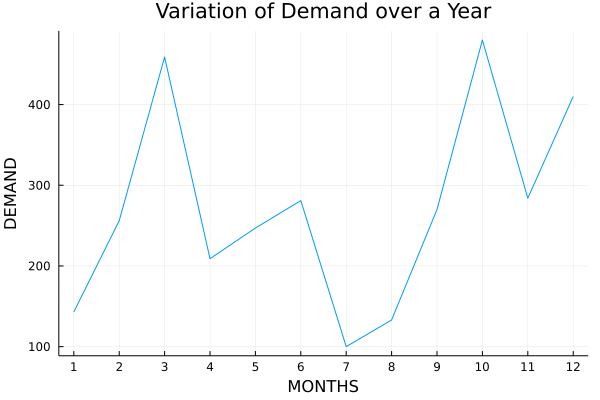

In [3]:
using Plots, Statistics, Optim, GLPK
demand = [143, 256, 459, 209, 247, 281, 100, 133, 270, 480, 284, 410]
preorder_number = [52, 128, 167, 105, 244, 193, 81, 76, 217, 468, 195, 341]

print("The co-relation between the demand and the pre-order is: ", cor(demand, preorder_number))

plot(demand, xlabel = "MONTHS", ylabel = "DEMAND",  legend = false, title = "Variation of Demand over a Year", xticks = 1:length(demand))

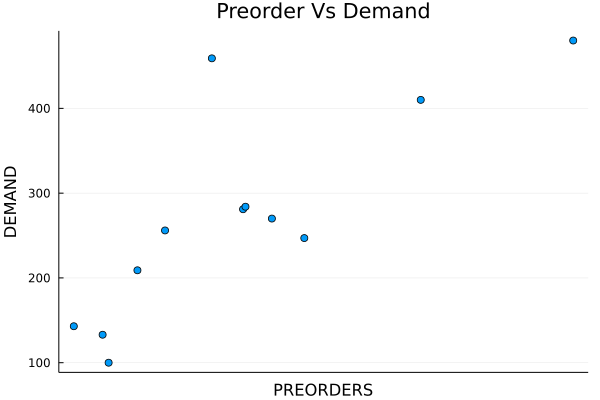

In [4]:
p = 850                                    # Unit price i.e purcahse price
c = 250                                    # Unit cost of the ticket

scatter(preorder_number, demand, xlabel = "PREORDERS", ylabel="DEMAND", legend = false, xticks = 1:length(demand), title = "Preorder Vs Demand")

In [5]:
#Profit formulation

Pϕ(q,di) = p*min(q,di) - c*q    #profit for a signle day

P°(q,d) = sum([Pϕ(qi, di) for (qi, di) in zip(preorder_number,demand)])  # total profit over the period of a year


P° (generic function with 1 method)

In [6]:
# Formulating a linear Regression model

Y(α,O) = α[1] .+ α[2]O  # simple linear model y=mx+c
fl2(α) = sum((Y(α, preorder_number)- demand).^2)    #L2 loss function between true and predicted value

α = optimize(fl2, [0., 2.]).minimizer   # minimizing the L^2 loss

@show α

α = [116.33736361099196, 0.827504026770921]


2-element Vector{Float64}:
 116.33736361099196
   0.827504026770921

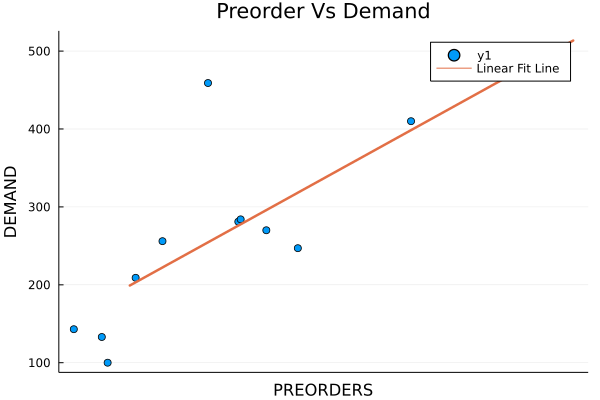

In [7]:
function linear_reg(alpha, demand)    # A function to return output of linear regression
    output = α[1] .+ α[2]demand
    return output
end

output = linear_reg(α, demand)
    
plot!(demand, output, legend = true, lw=2.5, label = "Linear Fit Line")

In [8]:
output = α[1] + α[2]*190
print("The number of passes for 13th month will be: ", ceil(output))

The number of passes for 13th month will be: 274.0

_Your Summary:_ Customer demand and preorder ticket number is given in the question. The correlation between the demand and the order is high ~ 0.8. 

I have used a simple Linear regression model to predict the future demand of 13th month. 

Assumption:

For optimizing the model, I have minimized L2 loss, not negative of the profit function.

---
__(3: 25 pts)__ Items A-F are available for shipment in an ISO container from Busan, South Korea, to Savannah, GA. The value ($/lb) and density (lb/ft3) for each item are listed in the following table. Determine the mix of items that should be shipped, given that the weight and cube capacity of the container is 29 tons (1 ton = 2000 lb) and 2,400 cubic feet, respectively, that each item should represent at least 10% and no more than 25% of the total weight of the shipment.

```
 Item    Value  Density  
────────────────────────
 A           6       12
 B           5       15
 C          10        8
 D           8       10
 E           7       32
 F           3       12
````

_Your Summary:_ A dataframe created based on the information available in the question. Variables and objective function formulated based on the decision variables. As density of each shipment is given, a new volumne constarint added in the model to limit the total volume of the shipments less than 2400 ft^3.

I have assumend that the shipments's weight will not always equal the total weight capacity of the container, i.e total shipment weight can be less than the container weight. Based on this assumption weight constraints formulated.



The final output is shown in the dataframe

In [1]:
using DataFrames, GLPK

df = DataFrame(Item = ['A', 'B', 'C', 'D', 'E', 'F'], Value = [6, 5, 10, 8, 7, 3], 
                        Density = [12, 15, 8, 10, 32, 12])

df

,Item,Value,Density
,Char,Int64,Int64
1,A,6,12
2,B,5,15
3,C,10,8
4,D,8,10
5,E,7,32
6,F,3,12


In [15]:
p = df.Value 
density = df.Density

N = 1:length(d)

model = Model(GLPK.Optimizer)

@variable(model, 0 <= x[i = N])                        #  decision variables
@objective(model, Max, sum(p[i]*x[i] for i in N))      # objective function for maximize the profit
@constraint(model, sum(x[i] for i in N) <= 58e3)       # weight constraint
@constraint(model, sum(x[i]/density[i] for i in N) <= 2400)  # density constraint


# Assumption: Total weight of the shipments can be less than the the container weight


for i in 1:length(N)
    @constraint(model, 0.1*sum(x[i] for i in N) <= x[i])
end


for i in 1:length(N)
    @constraint(model, 0.25*sum(x[i] for i in N) >= x[i])
end



optimize!(model)
println(model)

TC° = objective_value(model)
X° = value.(x)


Max 6 x[1] + 5 x[2] + 10 x[3] + 8 x[4] + 7 x[5] + 3 x[6]
Subject to
 -0.75 x[1] + 0.25 x[2] + 0.25 x[3] + 0.25 x[4] + 0.25 x[5] + 0.25 x[6] >= 0.0
 0.25 x[1] - 0.75 x[2] + 0.25 x[3] + 0.25 x[4] + 0.25 x[5] + 0.25 x[6] >= 0.0
 0.25 x[1] + 0.25 x[2] - 0.75 x[3] + 0.25 x[4] + 0.25 x[5] + 0.25 x[6] >= 0.0
 0.25 x[1] + 0.25 x[2] + 0.25 x[3] - 0.75 x[4] + 0.25 x[5] + 0.25 x[6] >= 0.0
 0.25 x[1] + 0.25 x[2] + 0.25 x[3] + 0.25 x[4] - 0.75 x[5] + 0.25 x[6] >= 0.0
 0.25 x[1] + 0.25 x[2] + 0.25 x[3] + 0.25 x[4] + 0.25 x[5] - 0.75 x[6] >= 0.0
 x[1] + x[2] + x[3] + x[4] + x[5] + x[6] <= 58000.0
 0.08333333333333333 x[1] + 0.06666666666666667 x[2] + 0.125 x[3] + 0.1 x[4] + 0.03125 x[5] + 0.08333333333333333 x[6] <= 2400.0
 -0.9 x[1] + 0.1 x[2] + 0.1 x[3] + 0.1 x[4] + 0.1 x[5] + 0.1 x[6] <= 0.0
 0.1 x[1] - 0.9 x[2] + 0.1 x[3] + 0.1 x[4] + 0.1 x[5] + 0.1 x[6] <= 0.0
 0.1 x[1] + 0.1 x[2] - 0.9 x[3] + 0.1 x[4] + 0.1 x[5] + 0.1 x[6] <= 0.0
 0.1 x[1] + 0.1 x[2] + 0.1 x[3] - 0.9 x[4] + 0.1 x[5] + 0.1 x[6] 

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 1:6
And data, a 6-element Vector{Float64}:
 3186.7219917012435
 6373.443983402489
 3186.721991701242
 7966.804979253108
 7966.804979253108
 3186.721991701243

In [16]:
df = DataFrame(Item = ['A', 'B', 'C', 'D', 'E', 'F'], Value = [6, 5, 10, 8, 7, 3], 
                        Density = [12, 15, 8, 10, 32, 12], Qty_in_lb = [X°[1], X°[2], X°[3], X°[4], X°[5], X°[6]])

println("Mix of itam that should be shipped is shown below in dataframe")

df

Mix of itam that should be shipped is shown below in dataframe


,Item,Value,Density,Qty_in_lb
,Char,Int64,Int64,Float64
1,A,6,12,3186.72
2,B,5,15,6373.44
3,C,10,8,3186.72
4,D,8,10,7966.8
5,E,7,32,7966.8
6,F,3,12,3186.72


---
__(4: 25 pts)__ Next week, three facilities located in Greensboro, Raleigh, and Statesville will be able to supply 60, 100, and 80 tons, respectively, of bulk material to construction sites. Sites in Asheville, Durham, Raleigh, Wilmington, and Winston-Salem will require 40, 55, 35, 70, and 25 tons of material next week, respectively. Assuming that the cost to transport one ton one mile is \\$0.10, determine the minimum total cost to supply all of these sites next week. In the figure below, the mile marker of each city along I-40 is shown (e.g., Statesville is at mile marker 150 and Asheville is at 50, so the distance between the cities along I-40 is 100 miles). 

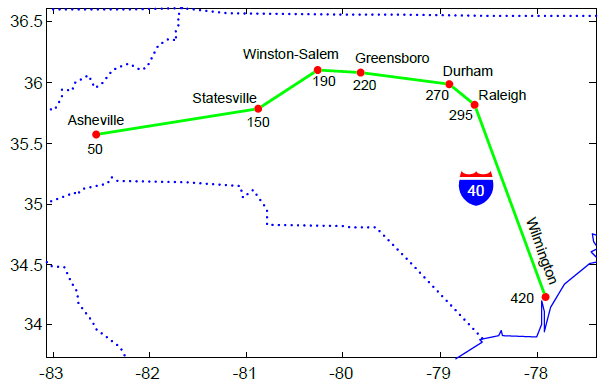


_Your Summary:_  First distance matrix calculated based on the the I-40 highway map. As the rate is given $0.10 per ton for one mile, the cost matrix can be calcualted by multiplying the distance matrix with the rate (final cost_matrix). Based on the information available in the question, variable, objective function and the constraints formulated which returns an allocation between supply and demand locations. Finally multiplying alocation matrix with cost matrix, we can get the minimum cost of transportation. 

In [17]:
supply = [60, 100, 80]     # supply matrix
demand = [40,55,35,70,25]  # demand matrix
distance_matrix = [170 50 75 200 30; 245 25 0 125 105; 100 120 145 270 40]
cost_to_transport_matrix = [0.1 0.1 0.1 0.1 0.1; 0.1 0.1 0.1 0.1 0.1; 0.1 0.1 0.1 0.1 0.1]

cost_matrix = distance_matrix .* cost_to_transport_matrix   #($/mile) cost of transportation
@show cost_matrix

cost_matrix = [17.0 5.0 7.5 20.0 3.0; 24.5 2.5 0.0 12.5 10.5; 10.0 12.0 14.5 27.0 4.0]


3×5 Matrix{Float64}:
 17.0   5.0   7.5  20.0   3.0
 24.5   2.5   0.0  12.5  10.5
 10.0  12.0  14.5  27.0   4.0

In [13]:
using JuMP, GLPK
function minimize_cost(C, supply, demand)
    D = 1:length(demand)
    S = 1:length(supply)
    model = Model(GLPK.Optimizer)
    
    @variable(model, 0 <= X[1:length(S), 1:length(D)])
    @objective(model, Min, sum(C[i,j]*X[i,j] for i in S, j in D))
    
    for i in S
        @constraint(model, sum(X[i,j] for j in D) <= supply[i])
    end
    
    for j in D
        @constraint(model, sum(X[i,j] for i in S) == demand[j])
    end
    print(model)
    optimize!(model)
    return value.(X)
end


X° = minimize_cost(cost_matrix, supply, demand)


3×5 Matrix{Float64}:
  0.0  55.0   0.0   5.0   0.0
  0.0   0.0  35.0  65.0   0.0
 40.0   0.0   0.0   0.0  25.0

In [14]:
TC° = sum(X°.*cost_matrix)

print("The minimum cost for the transportation is: \$", TC°)

The minimum cost for the transportation is: $1687.5